In [1]:
import pandas as pd
import numpy as np

In [31]:
% matplotlib inline
import matplotlib.pyplot as plt

### 导入原始数据

In [63]:
df_1_o = pd.read_csv('002177M1.csv')
df_30_o = pd.read_csv('002177M30.csv')

### treat Time Index

In [62]:
def tmNorm(dataframe,tmcol):
    dataframe.loc[:,tmcol] = pd.to_datetime(dataframe[tmcol])
    dataframe.set_index(tmcol, inplace=True)
    return dataframe

In [64]:
df_1_o.drop('Tm.1', axis = 1, inplace=True)
df_1_o = tmNorm(df_1_o,'Tm')

In [65]:
df_30_o.drop('Tm.1', axis = 1, inplace=True)
df_30_o = tmNorm(df_30_o,'Tm')

### add calculated columns

In [49]:
def dfcal(dataframe):
    dataframe.is_copy = False
    dataframe.loc[:,'diff1'] = dataframe.C.diff(1)
    dataframe.loc[:,'drt'] = 0
    dataframe.loc[dataframe['diff1'] > 0,'drt'] = 1
    dataframe.loc[dataframe['diff1'] < 0,'drt'] = -1
    dataframe.loc[:,'mono1'] = dataframe.drt.rolling(3).sum()
    dataframe.loc[:,'diff2'] = dataframe['diff1'].rolling(2).sum()
    dataframe.loc[:,'diff3'] = dataframe['diff1'].rolling(3).sum()
    dataframe.loc[:,'pct1'] = dataframe.C.pct_change()
    dataframe.loc[:,'pct2'] = dataframe.C.pct_change(2)
    dataframe.loc[:,'pct3'] = dataframe.C.pct_change(3)
    return dataframe

In [66]:
df_30 = dfcal(df_30_o)

In [54]:
df_30.head(5)

,O,H,L,C,V,A,diff1,drt,mono1,diff2,diff3,pct1,pct2,pct3
Tm,,,,,,,,,,,,,,
2017-12-01 09:30:00,5.06,5.06,5.02,5.05,7072.0,478655.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-01 10:00:00,5.05,5.09,5.04,5.08,11382.0,180789.0,0.03,1,NaN,NaN,NaN,0.005941,NaN,NaN
2017-12-01 10:30:00,5.09,5.09,5.06,5.06,5506.0,45242.0,-0.02,-1,0.0,0.01,NaN,-0.003937,0.001980,NaN
2017-12-01 11:00:00,5.06,5.07,5.06,5.07,3623.0,162425.0,0.01,1,1.0,-0.01,0.02,0.001976,-0.001969,0.003960
2017-12-01 13:00:00,5.07,5.07,5.05,5.05,2098.0,51207.0,-0.02,-1,-1.0,-0.01,-0.03,-0.003945,-0.001976,-0.005906


### Vistualized Analysis

In [55]:
q = [0,.125,.25,.5,.75,.875,1]

In [74]:
TmS = pd.to_datetime('2018-02-9 14:00')
TmE = pd.to_datetime('2018-02-26 14:30')

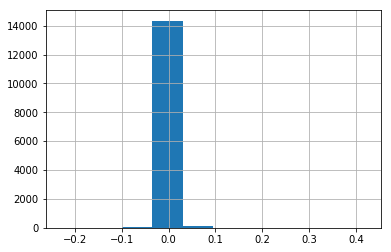

In [32]:
df_1['diff'].hist()

In [33]:
df_1['diff'].describe()

count    14531.000000
mean        -0.000020
std          0.011295
min         -0.230000
25%         -0.010000
50%          0.000000
75%          0.000000
max          0.420000
Name: diff, dtype: float64

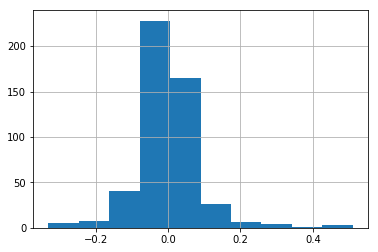

In [41]:
df_30['diff3'].hist()

In [48]:
df_30.diff3.describe(q)

count    486.000000
mean      -0.001955
std        0.086096
min       -0.330000
0%        -0.330000
12.5%     -0.070000
25%       -0.030000
50%        0.000000
75%        0.030000
87.5%      0.060000
100%       0.510000
max        0.510000
Name: diff3, dtype: float64

In [78]:
df_30[['pct3','pct2','pct1']].describe(q)

,pct3,pct2,pct1
count,486.000000,487.000000,488.000000
mean,-0.000255,-0.000162,-0.000076
std,0.017078,0.014379,0.010028
min,-0.061111,-0.068015,-0.056985
0%,-0.061111,-0.068015,-0.056985
12.5%,-0.014170,-0.010481,-0.007450
25%,-0.007002,-0.005970,-0.004020
50%,0.000000,0.000000,0.000000
75%,0.005510,0.004137,0.002378
87.5%,0.012203,0.009775,0.006028


In [75]:
df30xx = df_30[TmS:TmE]

In [76]:
df30xx.sort_values('pct3', ascending=False)

,O,H,L,C,V,A,diff1,drt,mono1,diff2,diff3,pct1,pct2,pct3
Tm,,,,,,,,,,,,,,
2018-02-12 09:30:00,4.17,4.24,4.16,4.22,13236.0,287813.0,0.09,1,3.0,0.10,0.12,0.021792,0.024272,0.029268
2018-02-12 10:00:00,4.21,4.27,4.21,4.24,9682.0,205379.0,0.02,1,3.0,0.11,0.12,0.004739,0.026634,0.029126
2018-02-12 10:30:00,4.24,4.26,4.22,4.25,7099.0,19080.0,0.01,1,3.0,0.03,0.12,0.002358,0.007109,0.029056
2018-02-22 10:00:00,4.31,4.35,4.30,4.33,4436.0,48675.0,0.02,1,3.0,0.07,0.08,0.004640,0.016432,0.018824
2018-02-22 10:30:00,4.33,4.34,4.32,4.33,3160.0,105009.0,0.00,0,2.0,0.02,0.07,0.000000,0.004640,0.016432
2018-02-26 11:00:00,4.41,4.44,4.41,4.44,4487.0,76299.0,0.02,1,3.0,0.05,0.07,0.004525,0.011390,0.016018
2018-02-26 10:30:00,4.39,4.43,4.39,4.42,4954.0,13608.0,0.03,1,3.0,0.05,0.06,0.006834,0.011442,0.013761
2018-02-26 13:00:00,4.44,4.46,4.44,4.44,4479.0,615841.0,0.00,0,2.0,0.02,0.05,0.000000,0.004525,0.011390
2018-02-12 11:00:00,4.25,4.28,4.25,4.26,4802.0,2125.0,0.01,1,3.0,0.02,0.04,0.002353,0.004717,0.009479
